In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style();

In [3]:
df = pd.read_csv('https://www.dropbox.com/s/ghgb8xggbhgyuk3/dataset-limpo.csv?dl=1', parse_dates=['time'])

df.index = pd.to_datetime(df['time'], infer_datetime_format=True)

df.head(1)

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12899 entries, 2010-12-20 20:30:00 to 2012-03-02 09:44:00
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  12899 non-null  int64         
 1   bairro              11196 non-null  object        
 2   created_at          12899 non-null  object        
 3   descricao           12898 non-null  object        
 4   endereco            12899 non-null  object        
 5   id.1                12899 non-null  int64         
 6   ip_address_origin   11705 non-null  object        
 7   latitude            12899 non-null  float64       
 8   longitude           12899 non-null  float64       
 9   registrou_bo        12375 non-null  object        
 10  sexo                12899 non-null  int64         
 11  tipo_assalto_id     12899 non-null  int64         
 12  titulo              12899 non-null  object        
 13  uri        

In [9]:
def genero (i):
  if i == 1:
    return 'MASCULINO'
  else:
    return 'FEMININO'
  
df['sexo'] = df['sexo'].apply(lambda i: genero(i))

In [13]:
df.describe(include='O')

,bairro,created_at,descricao,endereco,ip_address_origin,registrou_bo,sexo,titulo,uri,Bicicleta,...,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv
count,11196,12899,12898,12899,11705,12375,12899,12899,12899,256,...,239,324,552,45,764,5243,1350,106,443,178
unique,1577,12899,12898,11986,10432,2,2,10169,12899,1,...,1,1,1,1,1,1,1,1,1,1
top,São Paulo,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...",Carregando endereço,127.0.0.1,True,MASCULINO,Fui assaltado voltando do trabalho,/denuncias/a71rZe-entraram-na-minha-casa-e-fic...,True,...,True,True,True,True,True,True,True,True,True,True
freq,630,1,1,15,94,7340,7901,154,1,256,...,239,324,552,45,764,5243,1350,106,443,178


In [14]:
df_clean = df.copy()

In [17]:
bool_columns=['Bicicleta', 'Bolsa ou Mochila', 'Carteira','Cartão de Crédito',
'Celular', 'Computador','DVD', 'Dinheiro' , 'Documentos','Equipamento de Som','Estepe', 'MP4 ou Ipod', 'Móveis',
'Notebook','Outros', 'Relógio', 'Som', 'Tablet', 'Tv', 'registrou_bo']

df_clean[bool_columns] = df_clean[bool_columns].fillna(False)
df_clean[bool_columns] = df_clean[bool_columns].astype(str)

df_clean.head()
     

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00


In [19]:
#Verificar e excluir dados ausentes
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)
df_clean.dropna(subset=['bairro'], axis=0, inplace=True)
df.head(2)

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00


## ANALISE EXPLORATÓRIA

Para nossa análise não ficar bagunçada, vamos dividi-la nessas etapas
Quem foi roubado?
O que foi roubado?
Onde foi roubado?
Quando foi roubado?

In [21]:
#Quem foi roubado? De cara nós sabemos que "QUEM" está relacionado ao gênero.Então precisamos descobrir a quantide de gente que estásendo roubada
sexo = df['sexo'].value_counts()
sexo
#temos 12.899 casos de roubo nesse dataset

MASCULINO    7901
FEMININO     4998
Name: sexo, dtype: int64

In [29]:
homens = sexo['MASCULINO']
mulheres = sexo['FEMININO']
porc_masc = sexo['MASCULINO']/(sexo['MASCULINO'] + sexo['FEMININO'])*100
porc_femi = sexo['FEMININO']/(sexo['FEMININO'] + sexo['MASCULINO'])*100
print('Homens: {} ({:.2f}%)'.format(homens,porc_masc))
print('Mulheres: {} ({:.2f}%)'.format(mulheres,porc_femi))

Homens: 7901 (61.25%)
Mulheres: 4998 (38.75%)


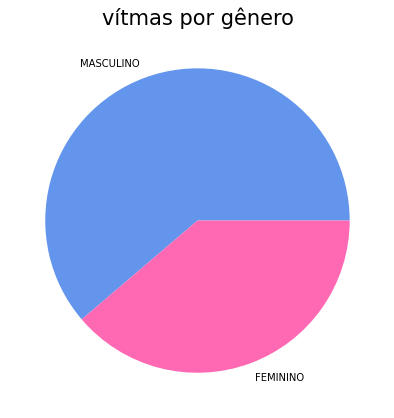

In [30]:
cor_genero = ['#6495ED','#FF69B4']
fig = plt.figure(figsize=(7,7))
sexo = df['sexo'].value_counts()
sexo_num = [sexo[0],sexo[1]]
plt.pie(sexo_num, labels=['MASCULINO','FEMININO'],colors=cor_genero)
plt.title('vítmas por gênero',fontsize=21);

#Registrou boletim de ocorrência


In [32]:
bo= df['registrou_bo'].value_counts()
bo

True     7340
False    5035
Name: registrou_bo, dtype: int64

In [37]:
sim = bo[True]
nao = bo[False]
porc_sim = sim/(sim + nao)*100
porc_nao = nao/(sim + nao)*100
print('Registraram BO: {} ({:.2f}%)'.format(sim,porc_sim))
print('Não registraram BO: {} ({:.2f}%)'.format(nao,porc_nao))

Registraram BO: 7340 (59.31%)
Não registraram BO: 5035 (40.69%)


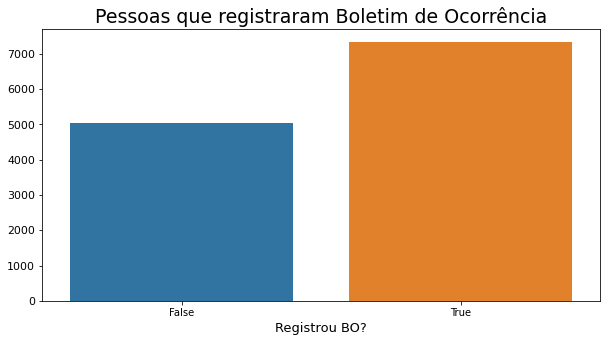

In [38]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='registrou_bo', data=df)
plt.xlabel('Registrou BO?',fontsize=13)
plt.ylabel('')
plt.yticks(fontsize=11)
plt.title('Pessoas que registraram Boletim de Ocorrência',fontsize=19);

In [39]:
df[(df['sexo'] == 'MASCULINO')&(df['registrou_bo'] == True)].shape[0]

4487

In [40]:
df[(df['sexo'] == 'MASCULINO')&(df['registrou_bo'] == False)].shape[0]

3087

REGISTROS DE BO 'MASCULINO'

*   4487 Homens Registraram BO
*   3087 Homens Não Registraram BO




In [41]:
df[(df['sexo'] == 'FEMININO')&(df['registrou_bo'] == True)].shape[0]

2853

In [42]:
df[(df['sexo'] == 'FEMININO')&(df['registrou_bo'] == False)].shape[0]

1948

REGISTROS DE BO 'MASCULINO'

* 2853 Mulheres Registraram BO
* 1948 Mulheres Não Registraram BO

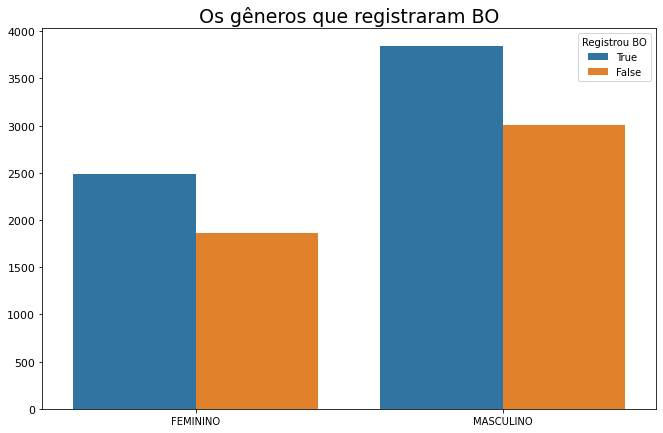

In [43]:
fig = plt.figure(figsize=(11,7))
sns.countplot(x='sexo',hue='registrou_bo',data=df_clean)
plt.xlabel('',fontsize=13)
plt.ylabel('')
plt.legend(title='Registrou BO')
plt.yticks(fontsize=11)
plt.title('Os gêneros que registraram BO',fontsize=19);

## O QUE FOI ROUBADO ?

In [44]:
df['valor_prejuizo'].describe()

count      12899.000000
mean        2745.264592
std        11115.126241
min            0.000000
25%           25.000000
50%          700.000000
75%         2000.000000
max      1000000.000000
Name: valor_prejuizo, dtype: float64

In [49]:
df_2 = df.describe(include='O')
df2_objetos = df.drop(columns=['bairro','id','created_at','descricao','endereco','id.1','ip_address_origin','latitude','longitude','registrou_bo','sexo','tipo_assalto_id','titulo','uri','user_id','valor_prejuizo','time'])
df2_objetos = df2_objetos.describe(include='O')
df2_objetos = df2_objetos.T
eixoy = df2_objetos.index
df2_objetos

,count,unique,top,freq
Bicicleta,256,1,True,256
Bolsa ou Mochila,3631,1,True,3631
Carteira,4243,1,True,4243
Cartão de Crédito,2776,1,True,2776
Celular,8377,1,True,8377
Computador,112,1,True,112
DVD,94,1,True,94
Dinheiro,1730,1,True,1730
Documentos,3660,1,True,3660
Equipamento de Som,239,1,True,239


In [50]:
obj_porc = df2_objetos['count'] / df2_objetos['count'].sum()*100
obj_porc

Bicicleta              0.750227
Bolsa ou Mochila      10.640917
Carteira              12.434428
Cartão de Crédito      8.135275
Celular               24.549424
Computador             0.328224
DVD                    0.275474
Dinheiro               5.069894
Documentos            10.725903
Equipamento de Som     0.700407
Estepe                 0.949506
MP4 ou Ipod            1.617677
Móveis                 0.131876
Notebook               2.238959
Outros                15.365003
Relógio                3.956276
Som                    0.310641
Tablet                 1.298245
Tv                     0.521642
Name: count, dtype: object

In [52]:
lista2 = []
lista2.append(df[(df['valor_prejuizo']== 0 ) & (df['sexo'] == 'MASCULINO')].shape[0])
for i in lista2:
  print(f'{i} homens tiveram R$0,00 reais de prejuizo')

1285 homens tiveram R$0,00 reais de prejuizo


In [53]:
lista2.append(df[(df['valor_prejuizo']== 0 ) & (df['sexo'] == 'FEMININO')].shape[0])
for i in lista2:
  print(f'{i} mulheres tiveram R$0,00 reais de prejuizo')

1285 mulheres tiveram R$0,00 reais de prejuizo
922 mulheres tiveram R$0,00 reais de prejuizo


## PREJUÍZO


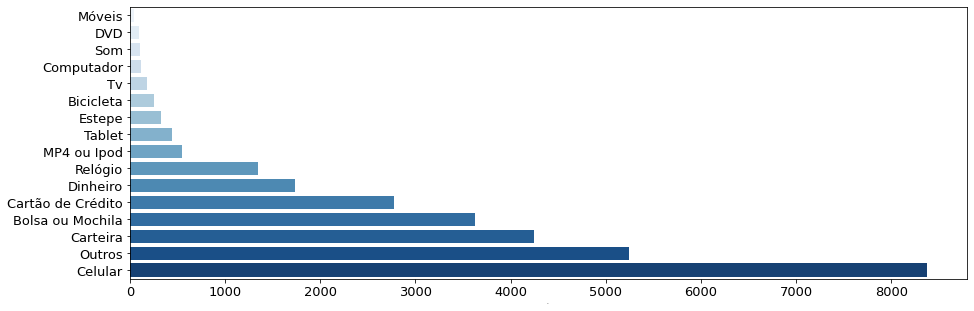

In [55]:
paleta1 = sns.color_palette("Blues",16)
fig = plt.figure(figsize=(15,5))
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel('',fontsize=0)
sns.barplot(x = 'freq', y = df2_objetos.index, order = ['Móveis','DVD','Som','Computador','Tv','Bicicleta','Estepe','Tablet','MP4 ou Ipod','Relógio','Dinheiro','Cartão de Crédito','Bolsa ou Mochila','Carteira','Outros','Celular'], palette=paleta1,data = df2_objetos);


Text(0.5, 0, '')

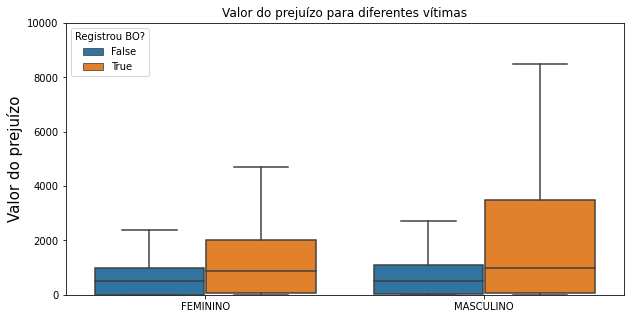

In [57]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='sexo',y='valor_prejuizo',showfliers=False,hue='registrou_bo',data=df)
plt.ylim(0,10000)
plt.title('Valor do prejuízo para diferentes vítimas')
plt.legend(title='Registrou BO?')
plt.ylabel('Valor do prejuízo',fontsize=15)
plt.xlabel('')

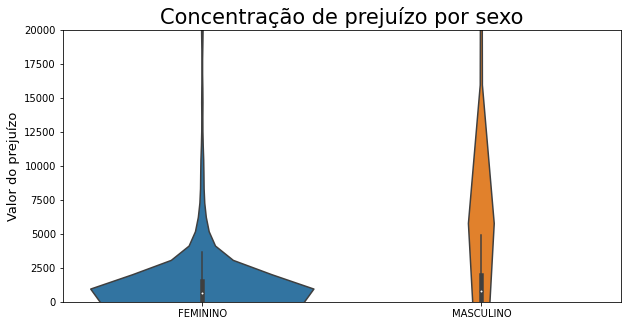

In [58]:
fig = plt.figure(figsize=(10,5))
sns.violinplot(x='sexo',y='valor_prejuizo',data=df)
plt.ylim(0,20000)
plt.title('Concentração de prejuízo por sexo',fontsize=21)
plt.ylabel('Valor do prejuízo',fontsize=13)
plt.xlabel('');


# Onde foi roubado?


In [59]:
df['bairro'].value_counts().max()

630

In [61]:
df['bairro'].value_counts().min()

1

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


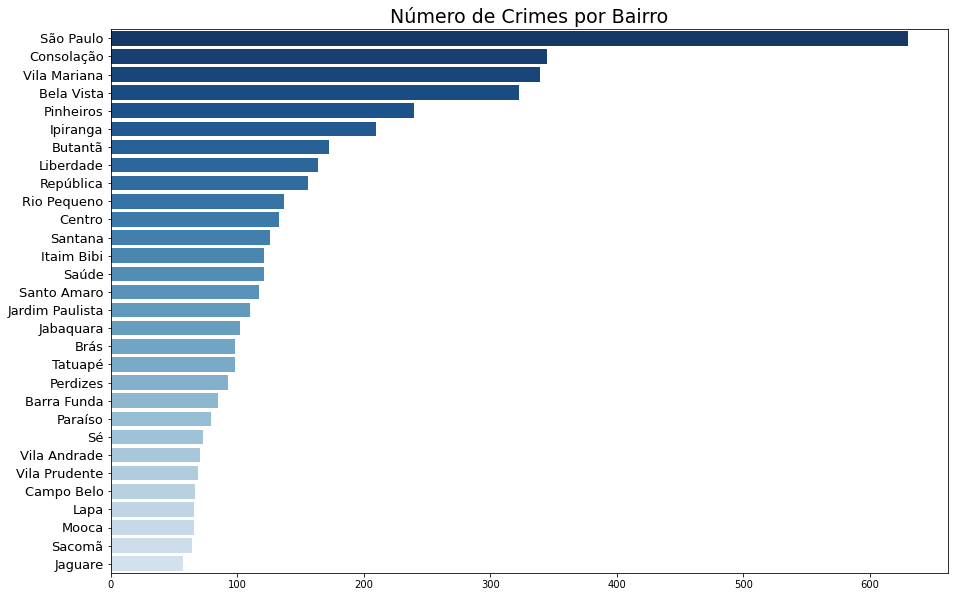

In [60]:
# coletando e ordenando os valores para cada bairro
paleta2 = sns.color_palette("Blues_r",37)
bairros = df_clean.bairro.value_counts().sort_values(ascending=False).iloc[0:30]
fig = plt.figure(figsize=(15,10))
sns.barplot(bairros.values, bairros.index,palette=paleta2,data=df);

plt.ylabel('')
plt.xlabel('')
plt.yticks(fontsize=13)
plt.title('Número de Crimes por Bairro',fontsize=19);

Podemos perceber que o bairro que tem mais crimes é São Paulo


## Quando foi Roubado

In [62]:
df_clean.index.year.value_counts()

2014    4079
2013    2179
2016    1857
2017    1569
2015     929
2012     368
2018     196
2010      11
2011       8
Name: time, dtype: int64

In [63]:
df_clean.index.month.value_counts()

8     1290
10    1151
6     1107
7     1034
11    1020
9     1013
1      839
5      817
3      798
2      787
4      702
12     638
Name: time, dtype: int64

In [64]:
df_clean.index.day.value_counts()

11    463
15    446
10    443
20    442
14    412
8     405
1     403
16    395
13    384
7     380
12    378
25    372
4     362
18    361
6     361
22    358
5     354
17    353
9     352
23    351
3     348
26    346
19    342
24    336
2     328
21    326
27    319
28    313
30    303
29    274
31    186
Name: time, dtype: int64

In [65]:
df_clean.index.weekday.value_counts()

4    1819
2    1797
3    1776
1    1658
5    1491
0    1420
6    1235
Name: time, dtype: int64

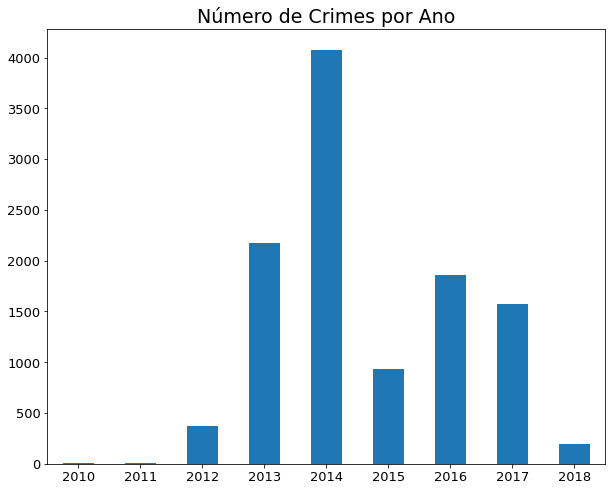

In [66]:
# criando a visualização
fig = plt.figure(figsize=(10,8))
df_clean.groupby([df_clean.index.year]).size().plot(kind='bar')
# definindo o título da visualização
plt.title('Número de Crimes por Ano',fontsize=19)
plt.xlabel('')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13,rotation=360);
     

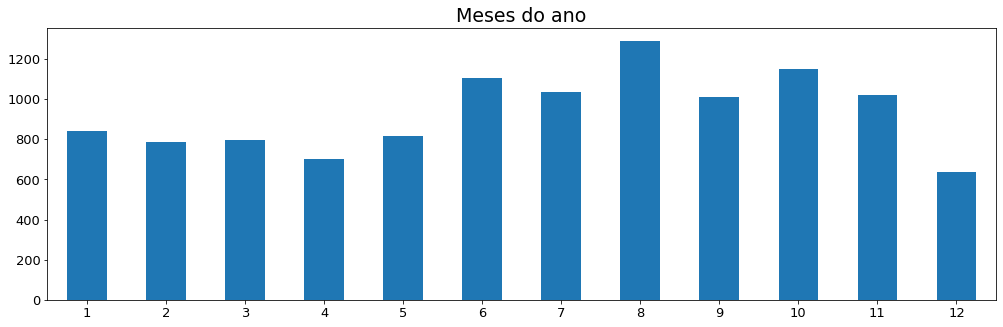

In [67]:
fig = plt.figure(figsize=(17,5))
df_clean.groupby([df_clean.index.month]).size().plot(kind='bar')
plt.title('Meses do ano',fontsize=19)
plt.xticks(fontsize=13,rotation=360)
plt.xlabel('')
plt.yticks(fontsize=13);


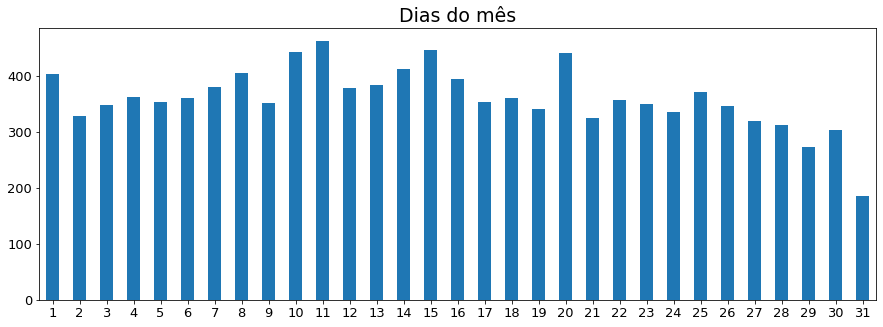

In [68]:
fig = plt.figure(figsize=(15,5))
df_clean.groupby([df_clean.index.day]).size().plot.bar()
plt.title('Dias do mês',fontsize=19)
plt.xticks(fontsize=13,rotation=360)
plt.xlabel('')
plt.yticks(fontsize=13);

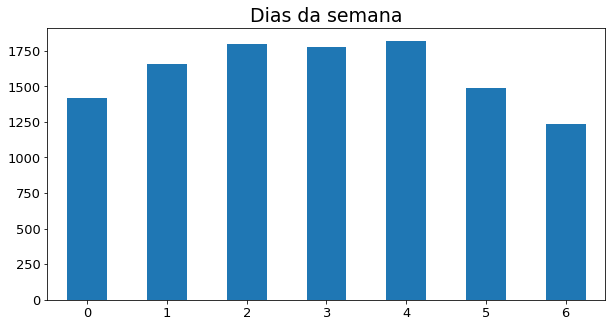

In [69]:
fig = plt.figure(figsize=(10,5))
df_clean.groupby([df_clean.index.weekday]).size().plot.bar()
plt.title('Dias da semana',fontsize=19)
plt.xticks(fontsize=13,rotation=360)
plt.xlabel('')
plt.yticks(fontsize=13);

# Conclusões
Temos várias conclusões através dos dados disponibilizados pela a plataforma
*   A maioria das pessoas roubadas são homens com **61,25%**;
*   **59,31%** das pessoas registram Boletim de Ocorrência;
*   O maior prejuízo foi o valor de **1 milhão de reais**, dentre o período em que os dados estão disponibilizados;
*   O objeto que mais é roubado no estado de São Paulo é o celular cerca de **8377** ou **24 %** do toal de objetos;
*   O bairro onde se concentra mais crimes é São Paulo com **633 crimes**;
*   O ano em que ocorreu mais crimes, foi em **2014**, para ser mais específico, com **4079** casos.












